
# Project: Investigate a Dataset - TMDB Movie data.


## Introduction
  
(TMDb) is a community built movie and TV database This data set contains information about nearly 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I would like to find other intresting patterns in the dataset.

Movie genres, how did they change all over the years. What about the revenues and movie popularity, do they correlate weach other. So Lets start exploring the dataset

Personally, I quite enjoy watching movies. One of the genres I really enjoy is science fiction.  But I haven't had an opportunity to explore a dataset like this to better understand what makes movies commercial successes. I look forward to exploring this dataset, learning and presenting my findings.

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.



### Let us start by loading up the necessary packages.

In [23]:
# Read data
import pandas as pd
import numpy as np

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data Wrangling


#### We can read the data from the CSV file into a dataframe. This data has already been cleaned up nicely and hence we don't need to do any pre-processing before analyzing it.

In [24]:
original_df = pd.read_csv('tmdb-movies.csv')
original_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
original_df.info()
original_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

# Data Cleaning: 
### Removing irrelevant columns and dropping missing value entries
It also looks there are a few columns with missing data. However, the first step is to drop columns that are not going to be useful for analysis. columns like homepage and id are not useful for our analysis. Columns with a lot of unique text for each movie like overview and tagline can be removed because we're not planning to use the plot summary in any text analytics and they are not necessary for the questions we're trying to answer. The columns production_countries and budget_adj, revenue_adj are not needed as well. Hence these columns as well as the ones mentioned in the previous section can be removed first.

In [26]:
#Changing the release_date column to Pandas DateTime

original_df['release_date'] = pd.to_datetime(original_df['release_date'])


In [27]:
# Checking for missing values 

original_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [28]:
#Dropping columns that are out of interest

dropped = original_df.drop(columns=['id', 'imdb_id', 'cast', 'budget_adj', 'overview', 'revenue_adj','homepage','tagline', 'keywords', 'production_companies'])


In [29]:
# droping rows with missing values

dropped.dropna(inplace = True)


In [30]:
# Show the basic statistics of this data set

dropped.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10801.000000,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000
mean,0.649450,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343
std,1.002395,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000
25%,0.209163,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000
50%,0.385492,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000
75%,0.717479,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000


### From the statistics above, we can see that the minimum budget, revenue, and runtime is 0. This is not reasonable in the real life . So we need to clean these data.

In [31]:
# Clean the invalid data and check the statistics again

fake_df = (dropped['budget'] == 0) | (dropped['revenue'] == 0) | (dropped['runtime'] == 0)

clean_df = dropped[~fake_df]
clean_df.describe()



,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000
mean,1.191671,3.721040e+07,1.076840e+08,109.204463,527.745978,6.167955,2001.261546
std,1.475097,4.220503e+07,1.765408e+08,19.912258,879.943178,0.795121,11.282931
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.462724,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,105.500000,204.000000,6.200000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


### And here is our final dataset we will be working on

In [32]:
clean_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


# Research Question 1 :

## What kinds of properties are associated with movies that have high revenues?

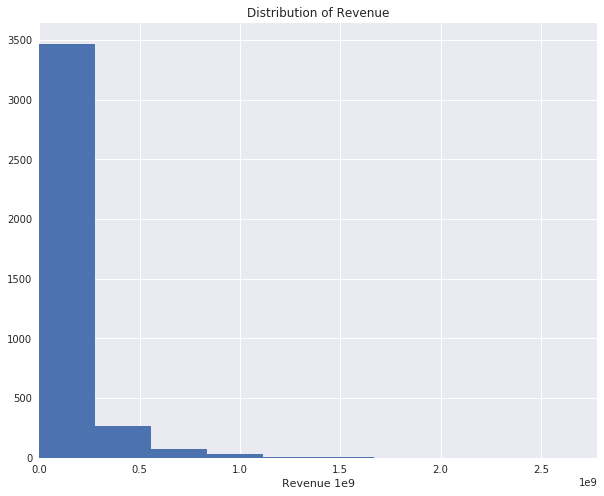

In [33]:
# Draw the histogram of the revenue

clean_df.revenue.hist(figsize= (10,8))
plt.title("Distribution of Revenue")
plt.xlabel('Revenue 1e9')
plt.xlim([2.000000e+00	, 2.781506e+09]);

### We will try to observe the change in revenue over the years and show  plot to help us understand the relation

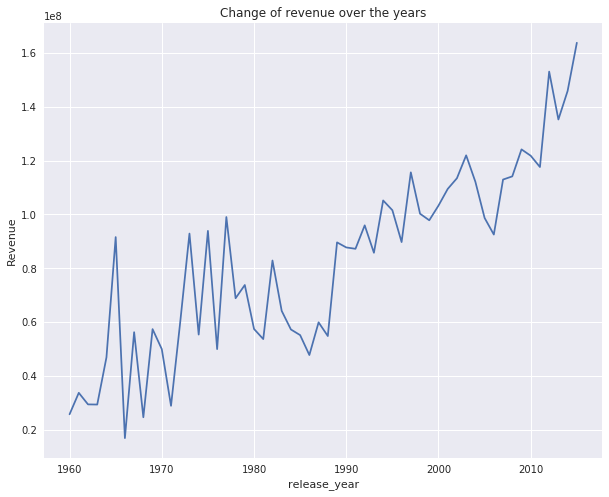

In [34]:
# Plot for the change of revenue over the years

rev_by_year = clean_df.groupby(['release_year'])['revenue'].mean()
rev_by_year.plot(figsize=(10,8))
plt.title('Change of revenue over the years')
plt.ylabel('Revenue');


From the line chart above, we can see that there are fluctuations of revenue over years but the over all trend is that revenue is increasing greatly over the years

### If there is any relation between movies released in specific period of the year and high revenue?

First, we need to extract the release month from release_date column using Pandas DateTime and assign this to a new column called release_month

In [35]:
clean_df['release_month'] = clean_df['release_date'].dt.month
clean_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,release_month
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,4


By grouping our data with release_month and calculating the average Revenue by month

Finnaly, plotting a bar chart to visualize our investigation

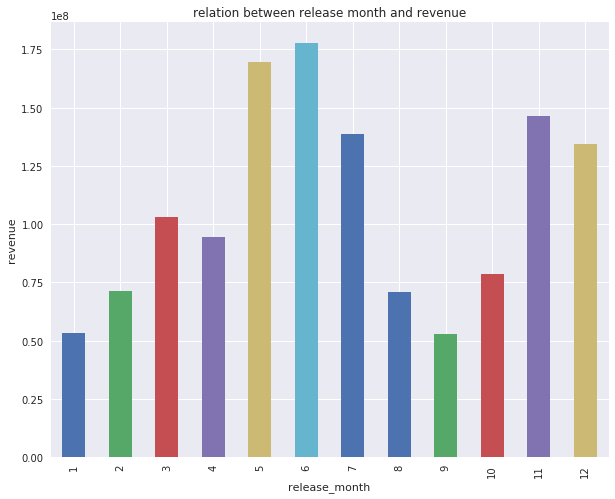

In [36]:
clean_df.groupby('release_month')['revenue'].mean().plot(kind='bar', figsize=(10,8))
plt.title('relation between release month and revenue')
plt.ylabel('revenue');

From this chart we can see that movies released in the middle of the year (Months May, June, July) and at the end of the year (Months November and December)Tend to have higher average revenue than others With the highest average revenue in *June* and lowest in *January* and *September*  

### So, If there is any relation betweeen Runtime and movie revenue?

We can draw a scatter plot with runtime of movies against the revenue

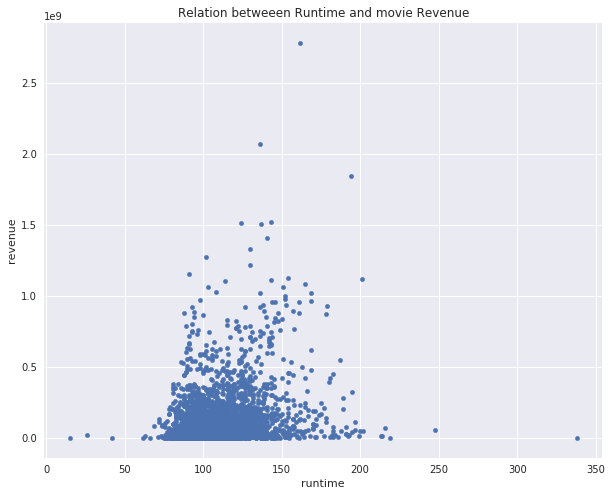

In [37]:
clean_df.plot(x='runtime', y='revenue', figsize=(10,8), kind='scatter')
plt.title('Relation betweeen Runtime and movie Revenue');

From the above plot, Runtime of movies with high revenue tend to be between 80 Minutes and 180 Minutes

### Now lets sort our data based on Revenue from highest to lowest and look at the top 500 Movies 

In [38]:
high_rev = clean_df.sort_values('revenue',ascending= False).iloc[:499]
high_rev.head()


,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,release_month
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,12
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,12
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,11
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012,4
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,6


### Now, We can look at some statisitcs of these top 500 Movies based on Revenue and try to explore some interesting trends

In [39]:
high_rev.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,release_month
count,499.000000,4.990000e+02,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.012527,1.012821e+08,4.609318e+08,118.334669,1921.034068,6.535671,2004.663327,7.258517
std,2.912570,6.168865e+07,2.759960e+08,22.481635,1532.713610,0.712292,8.676868,3.076551
min,0.131526,2.500000e+04,2.259910e+08,81.000000,48.000000,4.400000,1972.000000,1.000000
25%,1.463548,5.300000e+07,2.861546e+08,100.000000,807.500000,6.050000,1999.000000,5.000000
50%,2.245837,9.300000e+07,3.622117e+08,116.000000,1448.000000,6.500000,2007.000000,7.000000
75%,3.583361,1.425000e+08,5.438932e+08,131.500000,2647.000000,7.000000,2012.000000,11.000000
max,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,12.000000


### We can select the top 25 director in our top 500 movies in revenue  as they might be the most successful ones :)

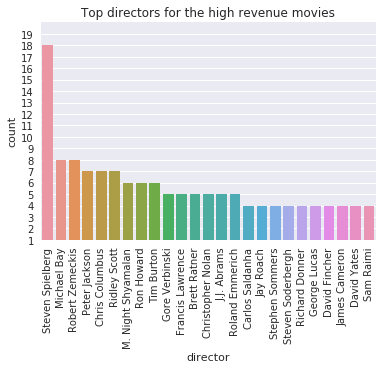

In [40]:
# plotting top 25 directors in the top 500 Movies in revenue 

ax = sns.countplot(x='director', data= high_rev, order=high_rev['director'].value_counts().iloc[:25].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_yticks(np.arange(20))
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title('Top directors for the high revenue movies')
plt.ylim(1,20);




From the above chart, Among the first 500 movies by revenue there are almost 18 Movies are directed by Steven Spielberg and at the second place comes Robert Zemeckis with 8 Movies

# Research Question 2 :

## Which genres are most popular from year to year?

### We will start with clean our genres column to split the row more than one genre into different rows

In [41]:
# Split the row with more than one genre into different rows
from itertools import chain

# Calculate lengths of splits
lens = clean_df['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
genres_df = pd.DataFrame({'release_year': np.repeat(clean_df['release_year'], lens),                 
                          'genres': list(chain.from_iterable(clean_df['genres'].str.split('|'))),
                          'popularity': np.repeat(clean_df['popularity'], lens)})

genres_df.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


### We need to select the most popular genres for each year, the comments in the code below explains what is the proccess of doing so

In [42]:
#Calculate the mean popularity for each genre in each year
pop_df = genres_df.groupby(['release_year', 'genres'], as_index=False).popularity.mean()
pop_df = pop_df.rename(columns={'popularity': 'mean_popularity'})
                       
# Select the most popular genre for each year
pop_df['pop_mean__max'] = pop_df.groupby(['release_year'])['mean_popularity'].transform(max)

#Subsetting the rows of interest
pop_df = pop_df[pop_df['mean_popularity'] == pop_df['pop_mean__max']]

pop_df.head()

,release_year,genres,mean_popularity,pop_mean__max
5,1960,Horror,2.610362,2.610362
7,1960,Thriller,2.610362,2.610362
11,1961,Animation,2.631987,2.631987
27,1962,Thriller,3.170651,3.170651
31,1963,Adventure,1.586280,1.586280


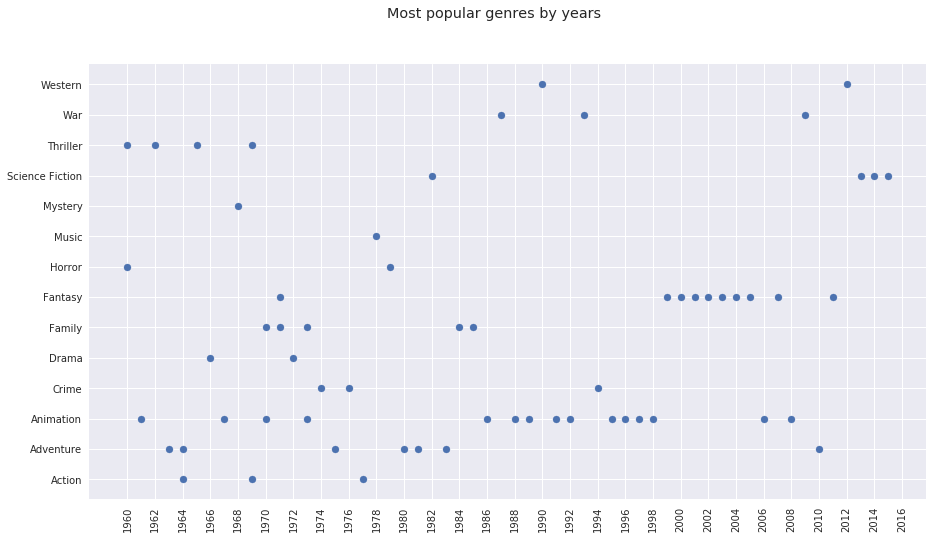

In [43]:
# plotting the most popular genres year by year

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(pop_df['release_year'], pop_df['genres'], label="dog")
fig.suptitle('Most popular genres by years')
plt.xticks(np.arange(min(pop_df['release_year']), max(pop_df['release_year'])+2, 2.0), rotation=90);




 From the scatterplot above, it is easy to show that the most popular genre changed over the year. However, in some periods there are no or little changes. Overall, the most popular genre in 1990s is animation, while it becomes fantasy in 2000s.

### We can also draw a pie chart representing the percent of most popular genres 


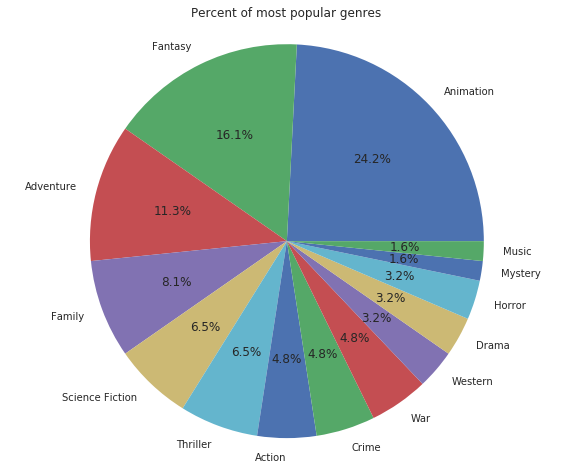

In [44]:
plt.pie(pop_df['genres'].value_counts().values,
        labels=pop_df['genres'].value_counts().index,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title("Percent of most popular genres")
plt.show()

From the pie chart, the 'Animation', 'Adventure', and 'Fantasy' account for a majority of percentage over the year, while other genres like 'Thriller' and 'History' are less frequent to become the most popular genre.

# Limitations


The limitation of this research is that there are so many data that have been cleaned in this report. These datas are seen as anomalies since they contains NaN, duplicates, or 0 in some columns. The amount of data changed from 10866 to 3854. The change is huge so that the results may not represent the population.

# Conclusions
Based on all of the discovery above, some conclusions are drawn:

- The revenue changed drastically over the year but showed an overall increase. The 1960s accounts for the least, while the 2010s accounts for the most.

- The revenue of high revenue movies shows a pattern or relation with release month and runtime,.

- The most popular genre of the movie changed over the year, although it shows the stability in some periods. Over the year, Animation, Fantasy, and Adventure account for a large proportion of the most popular genre.
